<AxesSubplot:>

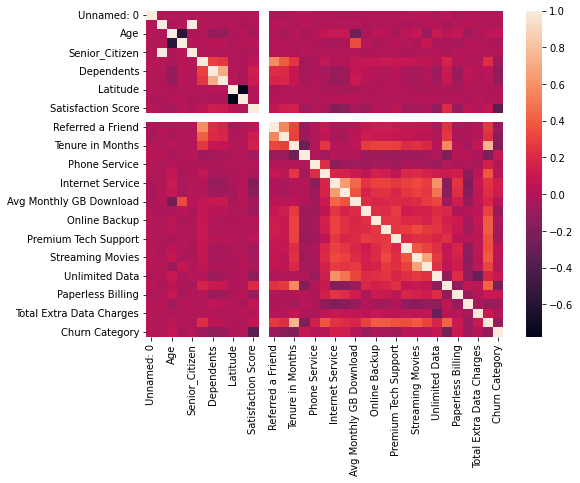

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# 匯入資料
df = pd.read_csv('All_Feature_TrainIDdataset.csv')
##### 使用pandas的corr######
# 刪除不相關資料
#del df['Customer ID']
# 獲取相關度資料
corr_pd = df.corr()
#使用seaborn做視覺化

import matplotlib.pyplot as plt
%matplotlib inline
# 指定畫幅
plt.figure(figsize=(8,6))
# 繪製熱力圖
sns.heatmap(corr_pd)

In [16]:
Train_Data = df.iloc[:, :-1]
Train_y = df.iloc[:, -1]
Train_Data = Train_Data.drop(labels=['Unnamed: 0'],axis = 1)
Train_Data

,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Latitude,Longitude,Satisfaction Score,...,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Total Extra Data Charges,Total Revenue
0,1.0,37.0,0.0,1.0,0.0,0.0,0.0,34.903052,-118.411251,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3923.45
1,0.0,54.0,0.0,0.0,0.0,0.0,0.0,34.903052,-118.411251,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,35.90
2,1.0,46.0,1.0,1.0,0.0,1.0,0.0,33.721917,-118.043237,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2182.45
3,1.0,23.0,1.0,1.0,0.0,0.0,0.0,36.192042,-122.000887,3.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,10.0,705.61
4,0.0,41.0,0.0,0.0,1.0,0.0,0.0,39.672813,-120.456699,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,10.0,3075.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,27.0,1.0,1.0,1.0,0.0,0.0,36.192042,-121.396719,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,62.35
5630,0.0,50.0,0.0,0.0,0.0,0.0,0.0,37.140104,-119.657092,3.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,3714.50
5631,1.0,60.0,0.0,1.0,0.0,1.0,2.0,37.140104,-119.657092,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1396.02
5632,0.0,46.0,0.0,0.0,0.0,1.0,3.0,36.192042,-119.754941,4.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1699.88


In [8]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train_Data, Train_y,test_size=0.2,random_state=0)
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=300,
    learning_rate=1,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)
# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]
print(bdt_discrete.score(X_train,y_train))
print(bdt_discrete.score(X_test,y_test))



/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8650987353006434
0.7258207630878438


In [12]:
df2 = pd.read_csv('TestID_withFeature.csv')
df2 = df2.drop(labels=['Unnamed: 0'],axis = 1)
Test_IDcsv = pd.read_csv('Test_IDs.csv')
#Test_IDcsv = Test_IDcsv.drop(labels=['Unnamed: 0'],axis = 1)
Test_IDcsv

,Customer ID
0,9938-EKRGF
1,7379-POKDZ
2,0654-HMSHN
3,2045-BMBTJ
4,0701-TJSEF
...,...
1404,4587-VVTOX
1405,7716-YTYHG
1406,7649-PHJVR
1407,7855-DIWPO


In [14]:
y_TestID_predict = bdt_discrete.predict(df2)
Test_IDcsv['Churn Category'] = y_TestID_predict
Test_IDcsv['Churn Category'] = Test_IDcsv['Churn Category'].apply(lambda x:int(x))
Test_IDcsv['Churn Category'].value_counts()

/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Number of Dependents
- Senior Citizen
- Under 30
Feature names seen at fit time, yet now missing:
- Number_of_Dependents
- Senior_Citizen
- Under_30

  warnings.warn(message, FutureWarning)


0    1122
1     222
2      28
3      25
5       6
4       6
Name: Churn Category, dtype: int64

In [15]:
Test_IDcsv.to_csv('Adaboost_Dtree_depth4.csv',index=False)

California    5393
Name: State, dtype: int64

<AxesSubplot:>

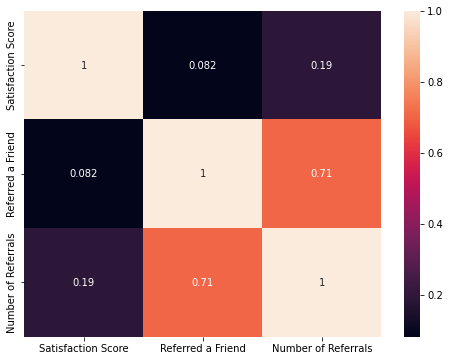

,Satisfaction Score,Referred a Friend,Number of Referrals
1201,4,0,0
1202,4,0,0
1203,4,0,0
1204,4,0,0
1205,4,0,0
...,...,...,...
3649,5,1,10
3650,5,1,10
3651,5,1,10
3652,5,1,10


<AxesSubplot:>

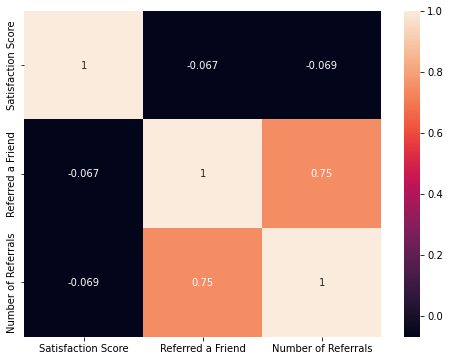